In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#  Carregar o dataset
df = pd.read_csv('Finance_data.csv')

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Colunas numéricas:", numeric_cols)

Colunas numéricas: Index(['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
       'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],
      dtype='object')


In [5]:
#  Detecção de Outliers: Z-SCORE

z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers_z = (z_scores > 3)

print("\nOutliers detectados pelo Z-score:")
print(outliers_z.sum())


Outliers detectados pelo Z-score:
2


In [6]:
#  Detecção de Outliers: IQR

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))

print("\nOutliers detectados pelo IQR:")
print(outliers_iqr.sum())



Outliers detectados pelo IQR:
age                 0
Mutual_Funds        3
Equity_Market       4
Debentures          1
Government_Bonds    7
Fixed_Deposits      0
PPF                 5
Gold                4
dtype: int64


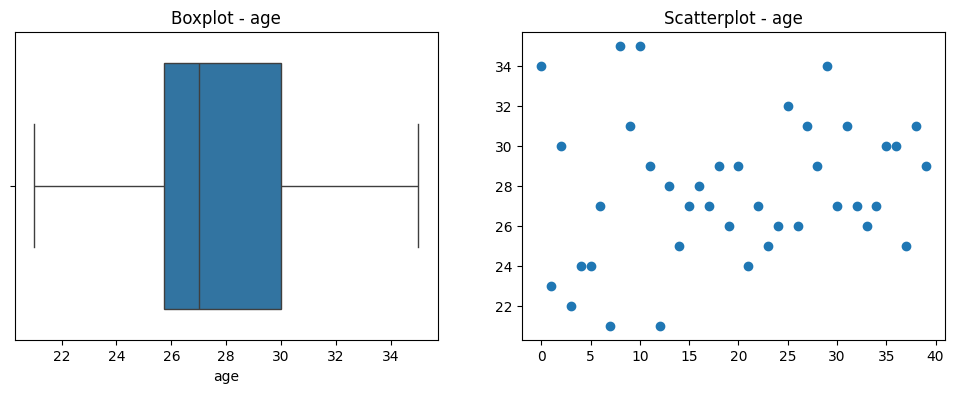

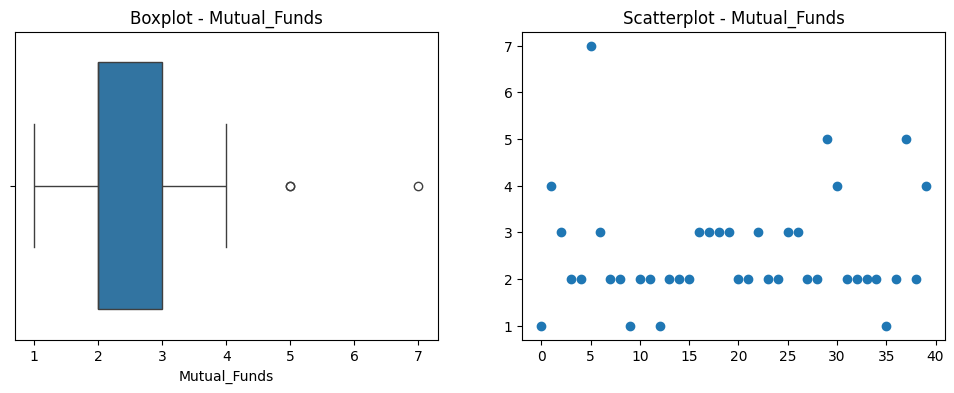

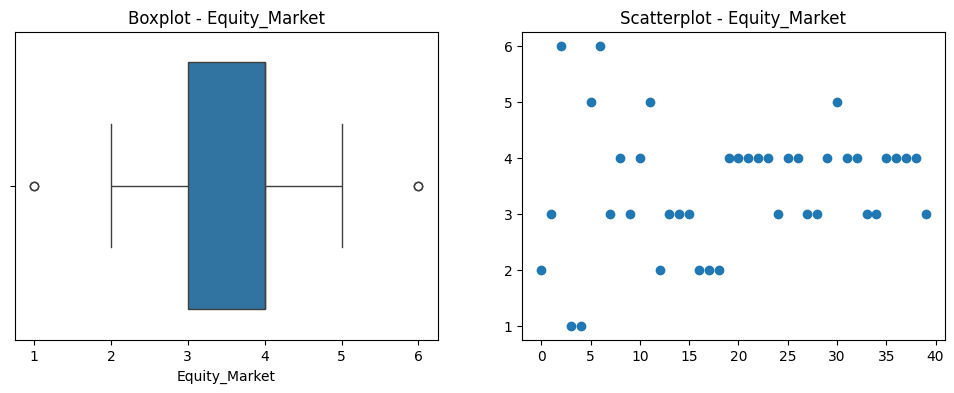

In [10]:
#  Visualizações (3 colunas de exemplo)

for col in numeric_cols[:3]:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")

    # Scatter
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(df[col])), df[col])
    plt.title(f"Scatterplot - {col}")

    plt.show()


In [12]:
# Estratégias para lidar com outliers

# Remoção de outliers (usando IQR)
df_removido = df[~outliers_iqr.any(axis=1)]

# Capping (limitar aos limites do IQR)
df_capping = df.copy()
for col in numeric_cols:
    df_capping[col] = np.where(df_capping[col] < lower_bound[col], lower_bound[col],
                        np.where(df_capping[col] > upper_bound[col], upper_bound[col], df_capping[col]))

# Transformação (log)
df_log = df[numeric_cols].apply(lambda x: np.log1p(x.clip(lower=0)))


In [13]:
# Comparar estatísticas descritivas
print("\n=== Estatísticas Originais ===")
print(df[numeric_cols].describe())

print("\n=== Após Remoção de Outliers ===")
print(df_removido[numeric_cols].describe())

print("\n=== Após Capping ===")
print(df_capping[numeric_cols].describe())

print("\n=== Após Transformação Log ===")
print(df_log.describe())


=== Estatísticas Originais ===
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.